# SageMath manifold tutorial (SymPy version)

This worksheet provides a short introduction to differentiable manifolds in SageMath, with [SymPy](http://www.sympy.org) as symbolic engine, instead of SageMath's default one (Pynac+Maxima). The tools described below have been implemented through the
[SageManifolds project](http://sagemanifolds.obspm.fr) (version 1.1, included in SageMath 8.1).

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.1/SM_tutorial_sympy.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`


The following assumes that you are using version 8.1 (or higher) of SageMath, since lower versions do not include the SymPy symbolic engine for computations on manifolds:

In [1]:
version()

'SageMath version 8.1.beta8, Release Date: 2017-10-16'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex
from sympy import init_printing
init_printing()

## Defining a manifold

As an example let us define a differentiable manifold of dimension 3 over $\mathbb{R}$:

In [3]:
M = Manifold(3, 'M', latex_name=r'\mathcal{M}', start_index=1)

- The first argument, `3`, is the manifold dimension. In SageManifolds, it can be any
  positive integer.
- The second argument, `'M'`, is a string defining the manifold's name; it may be 
  different from the symbol set on the left-hand side of the = sign (here `M`): the latter
  stands for a mere Python variable, which refers to the manifold object in the computer 
  memory, while the string `'M'` is the mathematical symbol chosen for the manifold.
- The optional argument `latex_name=r'\mathcal{M}'` sets the LaTeX
  symbol to display the manifold. Note the letter 'r' in front on the first quote: 
  it indicates that the  string is a *raw* one, so that the backslash character 
  in `\mathcal` is considered as an ordinary character (otherwise, the backslash is 
  used to escape some special characters). If the argument `latex_name` is not 
  provided by the user, it is set to the string used as the second argument (here `'M'`)
- The optional argument `start_index=1` defines the range of indices to be used for 
  tensor components on the manifold: setting it to 1 means that indices will range 
  in $\{1,2,3\}$. The default value is `start_index=0`.

Note that the default base field is $\mathbb{R}$. If we would have used the optional
argument `field='complex'`, we would have defined a manifold over $\mathbb{C}$. See
[list of all options](http://doc.sagemath.org/html/en/reference/manifolds/sage/manifolds/manifold.html#sage.manifolds.manifold.Manifold) more details. 

If we ask for M, it is displayed via its LaTeX symbol:

In [4]:
M

3-dimensional differentiable manifold M

We ask for all symbolic computations to be performed with [SymPy](http://www.sympy.org), instead of SageMath's default symbolic engine (Pynac+Maxima, implemented via SageMath's Symbolic Ring):

In [5]:
M.set_calculus_method('sympy')

If we use the `print` function instead, we get a short description of the object:

In [6]:
print(M)

3-dimensional differentiable manifold M


<p>Via the command <span style="font-family: courier new,courier;">type</span>, we get the type of the Python object corresponding to M (here the Python class <span style="font-family: courier new,courier;">DifferentiableManifold_with_category</span>):</p>

In [7]:
type(M)

<class 'sage.manifolds.differentiable.manifold.DifferentiableManifold_with_category'>

We can also ask for the category of M and see that it is the category of smooth manifolds over $\mathbb{R}$:

In [8]:
category(M)

Category of smooth manifolds over Real Field with 53 bits of precision

<p>The indices on the manifold are generated by the method <span style="font-family: courier new,courier;">irange()</span>, to be used in loops:</p>

In [9]:
for i in M.irange():
    print(i)

1
2
3


<p>If the parameter<span style="font-family: courier new,courier;"> start_index</span> had not been specified, the default range of the indices would have been $\{0,1,2\}$ instead:</p>

In [10]:
M0 = Manifold(3, 'M', r'\mathcal{M}')
for i in M0.irange():
    print(i)

0
1
2


<h2>Defining a chart on the manifold</h2>
<p>Let us assume that the manifold $\mathcal{M}$ can be covered by a single chart (other cases are discussed below); the chart is declared as follows:</p>

In [11]:
X.<x,y,z> = M.chart()

The writing `.<x,y,z>` in the left-hand side means that the Python variables `x`, `y` and `z` are set to the three coordinates of the chart. This allows one to refer subsequently to the coordinates by their names.

In this example, the function `chart()` has no arguments, which implies that the coordinate symbols will be `x`, `y` and `z` (i.e. exactly the characters set in the `<...>` operator) and that each coordinate range is $(-\infty,+\infty)$. For other cases, an argument must be passed to `chart()`  to specify the coordinate symbols and range, as well as the LaTeX symbol of a coordinate if the latter is different from the coordinate name (an example will be provided below).

<p>The chart is displayed as a pair formed by the open set covered by it (here the whole manifold) and the coordinates:</p>

In [12]:
print(X)

Chart (M, (x, y, z))


In [13]:
X

Chart (M, (x, y, z))

<p>The coordinates can be accessed individually, by means of their indices, following the convention defined by <span style="font-family: courier new,courier;">start_index=1</span> in the manifold's definition:</p>

In [14]:
X[1]

x

In [15]:
X[2]

y

In [16]:
X[3]

z

<p>The full set of coordinates is obtained by means of the operator [:]:</p>

In [17]:
X[:]

(x, y, z)

Thanks to the operator `<x,y,z>` used in the chart declaration, each coordinate can be accessed directly via its name:

In [18]:
z is X[3]

True

Coordinates are SageMath symbolic expressions:

In [19]:
type(z)

<type 'sage.symbolic.expression.Expression'>

<h3>Functions of the chart coordinates</h3>
<p>Real-valued functions of the chart coordinates (mathematically speaking, <em>functions defined on the chart codomain</em>) are generated via the method <span style="font-family: courier new,courier;">function()</span> acting on the chart:</p>

In [20]:
f = X.function(x+y^2+z^3) ; f

x + y**2 + z**3

In [21]:
f.display()

(x, y, z) |--> x + y**2 + z**3

In [22]:
f(1,2,3)

They belong to SageMath class `ChartFunction`:

In [23]:
type(f)

<class 'sage.manifolds.chart_func.ChartFunctionRing_with_category.element_class'>

<p>and differ from SageMath standard symbolic functions by automatic simplifications in all operations. For instance, adding the two symbolic functions</p>

In [24]:
f0(x,y,z) = cos(x)^2 ; g0(x,y,z) = sin(x)^2

<p>results in</p>

In [25]:
f0 + g0

(x, y, z) |--> cos(x)^2 + sin(x)^2

while the sum of the corresponding functions in the class `ChartFunction` is automatically simplified:

In [26]:
f1 = X.function(cos(x)^2) ; g1 = X.function(sin(x)^2)
f1 + g1

1

<p>To get the same output with symbolic functions, one has to invoke the method <span style="font-family: courier new,courier;">simplify_trig()</span>:</p>

In [27]:
(f0 + g0).simplify_trig()

(x, y, z) |--> 1

<p>Another difference regards the display; if we ask for the symbolic function f0, we get:</p>

In [28]:
f0

(x, y, z) |--> cos(x)^2

<p>while if we ask for the chart function f1, we get only the coordinate expression:</p>

In [29]:
f1

cos(x)**2

<p>To get an output similar to that of f0, one should call the method <span style="font-family: courier new,courier;">display()</span>:</p>

In [30]:
f1.display()

(x, y, z) |--> cos(x)**2

Note that the method `expr()` returns the underlying symbolic expression:

In [31]:
f1.expr()

In the present case, it is a SymPy object:

In [32]:
type(f1.expr())

<class 'sympy.core.power.Pow'>

### Introducing a second chart on the manifold

Let us first consider an open subset of $\mathcal{M}$, for instance the complement $U$ of the region defined by $\{y=0, x\geq 0\}$ (note that `(y!=0, x<0)` stands for $y\not=0$ OR $x<0$; the condition $y\not=0$ AND $x<0$ would have been written `[y!=0, x<0]` instead):

In [33]:
U = M.open_subset('U', coord_def={X: (y!=0, x<0)})

Let us call `X_U` the restriction of the chart `X` to the open subset $U$:

In [34]:
X_U = X.restrict(U) ; X_U

Chart (U, (x, y, z))

<p>We introduce another chart on $U$, with spherical-type coordinates $(r,\theta,\phi)$:</p>

In [35]:
Y.<r,th,ph> = U.chart(r'r:(0,+oo) theta:(0,pi):\theta phi:(0,2*pi):\phi') ; Y

Chart (U, (r, theta, phi))

<p>The function <span style="font-family: courier new,courier;">chart()</span> has now some argument; it is a string, which contains specific LaTeX symbols, hence the prefix 'r' to it (for <em>raw</em> string). It also contains the coordinate ranges, since they are different from the default value, which is $(-\infty, +\infty)$. For a given coordinate, the various fields are separated by the character ':' and a space character separates the coordinates. Note that for the coordinate $r$, there are only two fields, since the LaTeX symbol has not to be specified. The LaTeX symbols are used for the outputs:</p>

In [36]:
th, ph

(theta, phi)

In [37]:
Y[2], Y[3]

(theta, phi)

<p>The declared coordinate ranges are now known to Sage, as we may check by means of the command <span style="font-family: courier new,courier; font-size: small;">assumptions()</span>:</p>

In [38]:
assumptions()

[x is real,
 y is real,
 z is real,
 r is real,
 r > 0,
 theta is real,
 theta > 0,
 theta < pi,
 phi is real,
 phi > 0,
 phi < 2*pi]

<p>They are used in simplifications:</p>

In [39]:
simplify(abs(r))

r

In [40]:
simplify(abs(x)) # no simplification occurs since x can take any value in R

abs(x)

<p>After having been declared, the chart Y can be fully specified by its relation to the chart X_U, via a transition map:</p>

In [41]:
transit_Y_to_X = Y.transition_map(X_U, [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])

In [42]:
transit_Y_to_X

Change of coordinates from Chart (U, (r, theta, phi)) to Chart (U, (x, y, z))

In [43]:
transit_Y_to_X.display()

x = r*cos(phi)*sin(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(theta)

<p>The inverse of the transition map can be specified by means of the method <span style="font-family: courier new,courier;">set_inverse()</span>:</p>

In [44]:
transit_Y_to_X.set_inverse(sqrt(x^2+y^2+z^2), atan2(sqrt(x^2+y^2),z), atan2(y, x))
transit_Y_to_X.inverse().display()

r = sqrt(x^2 + y^2 + z^2)
theta = arctan2(sqrt(x^2 + y^2), z)
phi = arctan2(y, x)

<p>At this stage, the manifold's <strong>atlas</strong> (the "user atlas", not the maximal atlas!) contains three charts:</p>

In [45]:
M.atlas()

[Chart (M, (x, y, z)), Chart (U, (x, y, z)), Chart (U, (r, theta, phi))]

<p>The first chart defined on the manifold is considered as the manifold's default chart (it can be changed by the method <span style="font-family: courier new,courier;">set_default_chart()</span>):</p>

In [46]:
M.default_chart()

Chart (M, (x, y, z))

<p>Each open subset has its own atlas (since an open subset of a manifold is a manifold by itself):</p>

In [47]:
U.atlas()

[Chart (U, (x, y, z)), Chart (U, (r, theta, phi))]

In [48]:
U.default_chart()

Chart (U, (x, y, z))

We can draw the chart $Y$ in terms of the chart $X$. 
Let us first define a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [49]:
viewer3D = 'threejs' # must be 'threejs', 'jmol', 'tachyon' or None (default)

The plot shows lines of constant coordinates from the $Y$ chart in a "Cartesian frame" based on the $X$ coordinates:

In [50]:
graph = Y.plot(X)
show(graph, viewer=viewer3D)

Graphics3d Object

The command plot() allows for many options, to control the number of coordinate lines to be drawn, their style and color, as well as the coordinate ranges (cf. the [list of all options](http://doc.sagemath.org/html/en/reference/manifolds/sage/manifolds/chart.html#sage.manifolds.chart.RealChart.plot)):

In [51]:
graph = Y.plot(X, ranges={r:(1,2), th:(0,pi/2)}, number_values=4, 
               color={r:'blue', th:'green', ph:'red'})
show(graph, aspect_ratio=1, viewer=viewer3D)

Graphics3d Object

<p>Conversly, the chart $X|_{U}$ can be plotted in terms of the chart $Y$ (this is not possible for the whole chart $X$ since its domain is larger than that of chart $Y$):</p>

In [52]:
#graph = X_U.plot(Y)
#show(graph, viewer=viewer3D, axes_labels=['r','theta','phi'])

<h2>Points on the manifold</h2>
<p>A point on $\mathcal{M}$ is defined by its coordinates in a given chart:</p>

In [53]:
p = M.point((1,2,-1), chart=X, name='p') ; print(p) ; p

Point p on the 3-dimensional differentiable manifold M


Point p on the 3-dimensional differentiable manifold M

<p>Since $X=(\mathcal{M}, (x,y,z))$ is the manifold's default chart, its name can be omitted:</p>

In [54]:
p = M.point((1,2,-1), name='p') ; print(p) ; p

Point p on the 3-dimensional differentiable manifold M


Point p on the 3-dimensional differentiable manifold M

<p>Of course, $p$ belongs to $\mathcal{M}$:</p>

In [55]:
p in M

True

<p>It is also in $U$:</p>

In [56]:
p in U

True

<p>Indeed the coordinates of $p$ have $y\not=0$:</p>

In [57]:
p.coord(X)

(1, 2, -1)

<p>Note in passing that since $X$ is the default chart on $\mathcal{M}$, its name can be omitted in the arguments of coord():</p>

In [58]:
p.coord()

(1, 2, -1)

<p>The coordinates of $p$ can also be obtained by letting the chart acting of the point (from the very definition of a chart!):</p>

In [59]:
X(p)

(1, 2, -1)

<p>Let $q$ be a point with $y = 0$ and $x \geq 0$:</p>

In [60]:
q = M.point((1,0,2), name='q')

<p>This time, the point does not belong to $U$:</p>

In [61]:
q in U

False

<p>Accordingly, we cannot ask for the coordinates of $q$ in the chart $Y=(U, (r,\theta,\phi))$:</p>

In [62]:
try:
    q.coord(Y)
except ValueError as exc:
    print("Error: " + str(exc))

Error: the point does not belong to the domain of Chart (U, (r, theta, phi))


<p>but we can for point $p$:</p>

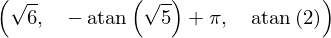

In [63]:
p.coord(Y)

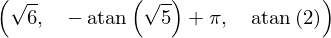

In [64]:
Y(p)

<p>Points can be compared:</p>

In [65]:
q == p

False

In [66]:
p1 = U.point((sqrt(6), pi-atan(sqrt(5)), atan(2)), Y)
p1 == p

True

<p>In SageMath's terminology, points are <strong>elements</strong>, whose <strong>parents</strong> are the manifold on which they have been defined:</p>

In [67]:
p.parent()

3-dimensional differentiable manifold M

In [68]:
q.parent()

3-dimensional differentiable manifold M

In [69]:
p1.parent()

Open subset U of the 3-dimensional differentiable manifold M

<h2>Scalar fields</h2>
<p>A scalar field is a differentiable mapping $U \longrightarrow \mathbb{R}$, where $U$ is an open subset of $\mathcal{M}$.</p>
<p>The scalar field is defined by its expressions in terms of charts covering its domain (in general more than one chart is necessary to cover all the domain):</p>

In [70]:
f = U.scalar_field({X_U: x+y^2+z^3}, name='f') ; print(f)

Scalar field f on the Open subset U of the 3-dimensional differentiable manifold M


<p>The coordinate expressions of the scalar field are passed as a Python dictionary, with the charts as keys, hence the writing <span style="font-family: courier new,courier;">{X_U: x+y^2+z^3}</span>.</p>
<p>Since in the present case, there is only one chart in the dictionary, an alternative writing is</p>

In [71]:
f = U.scalar_field(x+y^2+z^3, chart=X_U, name='f') ; print(f)

Scalar field f on the Open subset U of the 3-dimensional differentiable manifold M


<p>Since X_U is the domain's default chart, it can be omitted in the above declaration:</p>

In [72]:
f = U.scalar_field(x+y^2+z^3, name='f') ; print(f)

Scalar field f on the Open subset U of the 3-dimensional differentiable manifold M


As a mapping $U\subset\mathcal{M}\longrightarrow\mathbb{R}$, a scalar field acts on points, not on coordinates:

In [73]:
f(p)

The method `display()` provides the expression of the scalar field in terms of a given chart:

In [74]:
f.display(X_U)

f: U --> R
   (x, y, z) |--> x + y**2 + z**3

If no argument is provided, the method `display()` shows the coordinate expression of the scalar field in all the charts defined on the domain (except for *subcharts*, i.e. the restrictions of some chart to a subdomain):

In [75]:
f.display()

f: U --> R
   (x, y, z) |--> x + y**2 + z**3
   (r, theta, phi) |--> r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))

<p>Note that the expression of $f$ in terms of the coordinates $(r,\theta,\phi)$ has not been provided by the user but has been automatically computed by means of the change-of-coordinate formula declared above in the transition map. </p>

In [76]:
f.display(Y)

f: U --> R
   (r, theta, phi) |--> r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))

In each chart, the scalar field is represented by a function of the chart coordinates (an object of the type `ChartFunction` described above), which is accessible via the method `coord_function()`:

In [77]:
f.coord_function(X_U)

x + y**2 + z**3

In [78]:
f.coord_function(X_U).display()

(x, y, z) |--> x + y**2 + z**3

In [79]:
f.coord_function(Y)

r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))

In [80]:
f.coord_function(Y).display()

(r, theta, phi) |--> r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))

The "raw" symbolic expression (here a SymPy object) is returned by the method `expr()`:

In [81]:
f.expr(X_U)

In [82]:
f.expr(Y)

In [83]:
f.expr(Y) is f.coord_function(Y).expr()

True

<p>A scalar field can also be defined by some unspecified function of the coordinates:</p>

In [84]:
h = U.scalar_field(function('H')(x, y, z), name='h') ; print(h)

Scalar field h on the Open subset U of the 3-dimensional differentiable manifold M


In [85]:
h.display()

h: U --> R
   (x, y, z) |--> H(x, y, z)
   (r, theta, phi) |--> H(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))

In [86]:
h.display(Y)

h: U --> R
   (r, theta, phi) |--> H(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))

In [87]:
h(p) # remember that p is the point of coordinates (1,2,-1) in the chart X_U

<p>The parent of $f$ is the set $C^\infty(U)$ of all smooth scalar fields on $U$, which is a commutative algebra over $\mathbb{R}$:</p>

In [88]:
CU = f.parent() ; CU

Algebra of differentiable scalar fields on the Open subset U of the 3-dimensional differentiable manifold M

In [89]:
print(CU)

Algebra of differentiable scalar fields on the Open subset U of the 3-dimensional differentiable manifold M


In [90]:
CU.category()

Category of commutative algebras over Symbolic Ring

<div id="insert_new_cell_before91" class="insert_new_cell"> </div>
<div id="cell_text_91" class="text_cell">
<p>The base ring of the algebra is the field $\mathbb{R}$, which is represented here by SageMath's Symbolic Ring (SR):</p>
</div>
<div id="insert_new_cell_before86" class="insert_new_cell"> </div>

In [91]:
CU.base_ring()

Symbolic Ring

<p>Arithmetic operations on scalar fields are defined <span id="cell_outer_92"><span id="cell_outer_91"><span id="cell_outer_92">through the algebra structure:</span></span></span></p>

In [92]:
s = f + 2*h ; print(s)

Scalar field on the Open subset U of the 3-dimensional differentiable manifold M


In [93]:
s.display()

U --> R
(x, y, z) |--> x + y**2 + z**3 + 2*H(x, y, z)
(r, theta, phi) |--> r**3*cos(theta)**3 + r**2*sin(phi)**2*sin(theta)**2 + r*sin(theta)*cos(phi) + 2*H(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))

<h2>Tangent spaces</h2>
<p>The tangent vector space to the manifold at point $p$ is obtained as follows:</p>

In [94]:
Tp = M.tangent_space(p) ; Tp

Tangent space at Point p on the 3-dimensional differentiable manifold M

In [95]:
print(Tp)

Tangent space at Point p on the 3-dimensional differentiable manifold M


<p>$T_p\, \mathcal{M}$ is a 2-dimensional vector space over $\mathbb{R}$ (represented here by SageMath's Symbolic Ring (SR)) :</p>

In [96]:
print(Tp.category())

Category of finite dimensional vector spaces over Symbolic Ring


In [97]:
Tp.dim()

3

<p>$T_p\, \mathcal{M}$ is automatically endowed with vector bases deduced from the vector frames defined around the point:</p>

In [98]:
Tp.bases()

[Basis (d/dx,d/dy,d/dz) on the Tangent space at Point p on the 3-dimensional differentiable manifold M,
 Basis (d/dr,d/dtheta,d/dphi) on the Tangent space at Point p on the 3-dimensional differentiable manifold M]

<p>For the tangent space at the point $q$, on the contrary, there is only one pre-defined basis, since $q$ is not in the domain $U$ of the frame associated with coordinates $(r,\theta,\phi)$:</p>

In [99]:
Tq = M.tangent_space(q)
Tq.bases()

[Basis (d/dx,d/dy,d/dz) on the Tangent space at Point q on the 3-dimensional differentiable manifold M]

<p>A random element:</p>

In [100]:
v = Tp.an_element() ; print(v)

Tangent vector at Point p on the 3-dimensional differentiable manifold M


In [101]:
v.display()

d/dx + 2 d/dy + 3 d/dz

In [102]:
u = Tq.an_element() ; print(u)

Tangent vector at Point q on the 3-dimensional differentiable manifold M


In [103]:
u.display()

d/dx + 2 d/dy + 3 d/dz

<p>Note that, despite what the above simplified writing may suggest (the mention of the point $p$ or $q$ is omitted in the basis vectors), $u$ and $v$ are different vectors, for they belong to different vector spaces:</p>

In [104]:
v.parent()

Tangent space at Point p on the 3-dimensional differentiable manifold M

In [105]:
u.parent()

Tangent space at Point q on the 3-dimensional differentiable manifold M

<p>In particular, it is not possible to add $u$ and $v$:</p>

In [106]:
try:
    s = u + v
except TypeError as exc:
    print("Error: " + str(exc))

Error: unsupported operand parent(s) for +: 'Tangent space at Point q on the 3-dimensional differentiable manifold M' and 'Tangent space at Point p on the 3-dimensional differentiable manifold M'


<h2>Vector Fields</h2>
<p>Each chart defines a vector frame on the chart domain: the so-called <strong>coordinate basis</strong>:</p>

In [107]:
X.frame()

Coordinate frame (M, (d/dx,d/dy,d/dz))

In [108]:
X.frame().domain()  # this frame is defined on the whole manifold

3-dimensional differentiable manifold M

In [109]:
Y.frame()

Coordinate frame (U, (d/dr,d/dtheta,d/dphi))

In [110]:
Y.frame().domain() # this frame is defined only on U

Open subset U of the 3-dimensional differentiable manifold M

<p>The list of frames defined on a given open subset is <span>returned by the method <span style="font-family: courier new,courier;">frames()</span></span>:</p>

In [111]:
M.frames()

[Coordinate frame (M, (d/dx,d/dy,d/dz)),
 Coordinate frame (U, (d/dx,d/dy,d/dz)),
 Coordinate frame (U, (d/dr,d/dtheta,d/dphi))]

In [112]:
U.frames()

[Coordinate frame (U, (d/dx,d/dy,d/dz)),
 Coordinate frame (U, (d/dr,d/dtheta,d/dphi))]

In [113]:
M.default_frame()

Coordinate frame (M, (d/dx,d/dy,d/dz))

<p>Unless otherwise specified (via the command <span style="font-family: courier new,courier;">set_default_frame()</span>), the default frame is that associated with the default chart:</p>

In [114]:
M.default_frame() is M.default_chart().frame()

True

In [115]:
U.default_frame() is U.default_chart().frame()

True

<p>Individual elements of a frame can be accessed by means of their indices:</p>

In [116]:
e = U.default_frame() ; e2 = e[2] ; e2

Vector field d/dy on the Open subset U of the 3-dimensional differentiable manifold M

In [117]:
print(e2)

Vector field d/dy on the Open subset U of the 3-dimensional differentiable manifold M


<p><span id="cell_outer_109">We may define a new vector field as follows:</span></p>

In [118]:
v = e[2] + 2*x*e[3] ; print(v)

Vector field on the Open subset U of the 3-dimensional differentiable manifold M


In [119]:
v.display()

d/dy + 2*x d/dz

<p>A vector field can be defined by its components with respect to a given vector frame. When the latter is not specified, the open set's default frame is of course assumed:</p>

In [120]:
v = U.vector_field(name='v') # vector field defined on the open set U
v[1] = 1+y
v[2] = -x
v[3] = x*y*z
v.display()

v = (y + 1) d/dx - x d/dy + x*y*z d/dz

<p>Vector fields on $U$ are Sage <em>element</em> objects, whose <em>parent</em> is the set $\mathfrak{X}(U)$ of vector fields defined on $U$:</p>

In [121]:
v.parent()

Free module X(U) of vector fields on the Open subset U of the 3-dimensional differentiable manifold M

<p>The set $\mathfrak{X}(U)$ is a module over the commutative algebra $C^\infty(U)$ of scalar fields on $U$:</p>

In [122]:
print(v.parent())

Free module X(U) of vector fields on the Open subset U of the 3-dimensional differentiable manifold M


In [123]:
print(v.parent().category())

Category of finite dimensional modules over Algebra of differentiable scalar fields on the Open subset U of the 3-dimensional differentiable manifold M


In [124]:
v.parent().base_ring()

Algebra of differentiable scalar fields on the Open subset U of the 3-dimensional differentiable manifold M

<p>A vector field acts on scalar fields:</p>

In [125]:
f.display()

f: U --> R
   (x, y, z) |--> x + y**2 + z**3
   (r, theta, phi) |--> r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))

In [126]:
s = v(f) ; print(s)

Scalar field v(f) on the Open subset U of the 3-dimensional differentiable manifold M


In [127]:
s.display()

v(f): U --> R
   (x, y, z) |--> 3*x*y*z**3 - 2*x*y + y + 1
   (r, theta, phi) |--> 3*r**5*sin(phi)*sin(theta)**4*cos(phi)*cos(theta)**3 + 3*r**5*sin(phi)*sin(theta)**2*cos(phi)*cos(theta)**5 - 2*r**2*sin(phi)*sin(theta)**2*cos(phi) + r*sin(phi)*sin(theta) + 1

In [128]:
e[3].display()

d/dz = d/dz

In [129]:
e[3](f).display()

d/dz(f): U --> R
   (x, y, z) |--> 3*z**2
   (r, theta, phi) |--> 3*r**2*cos(theta)**2

<p>Unset components are assumed to be zero:</p>

In [130]:
w = U.vector_field(name='w')
w[2] = 3
w.display()

w = 3 d/dy

<p>A vector field on $U$ can be expanded in the vector frame associated with the chart $(r,\theta,\phi)$:</p>

In [131]:
v.display(Y.frame())

v = x*(y*z**2 + 1)/sqrt(x**2 + y**2 + z**2) d/dr + x*z*(-x**2*y - y**3 + 1)/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)) d/dtheta - (x**2 + y**2 + y)/(x**2 + y**2) d/dphi

<p>By default, the components are expressed in terms of the default coordinates $(x,y,z)$. To express them in terms of the coordinates $(r,\theta,\phi)$, one should add the corresponding chart as the second argument of the method <span style="font-family: courier new,courier;">display()</span>:</p>

In [132]:
v.display(Y.frame(), Y)

v = (r**3*sin(phi)*sin(theta)*cos(theta)**2 + 1)*sin(theta)*cos(phi) d/dr + (-r**3*sin(phi)*sin(theta)**3 + 1)*cos(phi)*cos(theta)/r d/dtheta - (r + sin(phi)/sin(theta))/r d/dphi

In [133]:
for i in M.irange(): 
    show(e[i].display(Y.frame(), Y))

d/dx = sin(theta)*cos(phi) d/dr + cos(phi)*cos(theta)/r d/dtheta - sin(phi)/(r*sin(theta)) d/dphi

d/dy = sin(phi)*sin(theta) d/dr + sin(phi)*cos(theta)/r d/dtheta + cos(phi)/(r*sin(theta)) d/dphi

d/dz = cos(theta) d/dr - sin(theta)/r d/dtheta

<p>The components of a tensor field w.r.t. the default frame can also be obtained as a list, via the command <span style="font-family: courier new,courier;">[:]</span>:</p>

In [134]:
v[:]

[y + 1, -x, x*y*z]

<p>An alternative is to use the method <span style="font-family: courier new,courier;">display_comp()</span>:</p>

In [135]:
v.display_comp()

v^x = y + 1 
v^y = -x 
v^z = x*y*z

<p>To obtain the components w.r.t. to another frame, one may go through the method <span style="font-family: courier new,courier;">comp()</span> and specify the frame:</p>

In [136]:
v.comp(Y.frame())[:]

[x*(y*z**2 + 1)/sqrt(x**2 + y**2 + z**2),
 x*z*(-x**2*y - y**3 + 1)/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)),
 -(x**2 + y**2 + y)/(x**2 + y**2)]

<p>However a shortcut is to provide the frame as the first argument of the square brackets:</p>

In [137]:
v[Y.frame(), :]

[x*(y*z**2 + 1)/sqrt(x**2 + y**2 + z**2),
 x*z*(-x**2*y - y**3 + 1)/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)),
 -(x**2 + y**2 + y)/(x**2 + y**2)]

In [138]:
v.display_comp(Y.frame())

v^r = x*(y*z**2 + 1)/sqrt(x**2 + y**2 + z**2) 
v^theta = x*z*(-x**2*y - y**3 + 1)/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)) 
v^phi = -(x**2 + y**2 + y)/(x**2 + y**2)

<p>Components are shown expressed in terms of the default's coordinates; to get them in terms of the coordinates $(r,\theta,\phi)$ instead, add the chart name as the last argument in the square brackets:</p>

In [139]:
v[Y.frame(), :, Y]

[(r**3*sin(phi)*sin(theta)*cos(theta)**2 + 1)*sin(theta)*cos(phi),
 (-r**3*sin(phi)*sin(theta)**3 + 1)*cos(phi)*cos(theta)/r,
 -(r + sin(phi)/sin(theta))/r]

<p>or specify the chart in <span style="font-family: courier new,courier;">display_comp()</span>:<span style="font-family: courier new,courier;"><br /></span></p>

In [140]:
v.display_comp(Y.frame(), chart=Y)

v^r = (r**3*sin(phi)*sin(theta)*cos(theta)**2 + 1)*sin(theta)*cos(phi) 
v^theta = (-r**3*sin(phi)*sin(theta)**3 + 1)*cos(phi)*cos(theta)/r 
v^phi = -(r + sin(phi)/sin(theta))/r

To get some vector component as a scalar field instead of a coordinate expression, use double square brackets:

In [141]:
print(v[[1]])

Scalar field on the Open subset U of the 3-dimensional differentiable manifold M


In [142]:
v[[1]].display()

U --> R
(x, y, z) |--> y + 1
(r, theta, phi) |--> r*sin(phi)*sin(theta) + 1

In [143]:
v[[1]].expr(X_U)

<p>A vector field can be defined with components being unspecified functions of the coordinates:</p>

In [144]:
u = U.vector_field(name='u')
u[:] = [function('u_x')(x,y,z), function('u_y')(x,y,z), function('u_z')(x,y,z)]
u.display()

u = u_x(x, y, z) d/dx + u_y(x, y, z) d/dy + u_z(x, y, z) d/dz

In [145]:
s = v + u ; s.set_name('s') ; s.display()

s = (y + u_x(x, y, z) + 1) d/dx + (-x + u_y(x, y, z)) d/dy + (x*y*z + u_z(x, y, z)) d/dz

<h3>Values of vector fields at a given point</h3>
<p>The value of a vector field at some point of the manifold is obtained via the method <span style="font-family: courier new,courier;">at()</span>:</p>

In [146]:
vp = v.at(p) ; print(vp)

Tangent vector v at Point p on the 3-dimensional differentiable manifold M


In [147]:
vp.display()

v = 3 d/dx - d/dy - 2 d/dz

<p>Indeed, recall that, w.r.t. chart X_U=$(x,y,z)$,  the coordinates of the point $p$ and the components of the vector field $v$ are</p>

In [148]:
p.coord(X_U)

(1, 2, -1)

In [149]:
v.display(X_U.frame(), X_U)

v = (y + 1) d/dx - x d/dy + x*y*z d/dz

<p>Note that to simplify the writing, the symbol used to denote the value of the vector field at point $p$ is the same as that of the vector field itself (namely $v$); this can be changed by the method <span style="font-family: courier new,courier;">set_name()</span>:</p>

In [150]:
vp.set_name(latex_name='v|_p')
vp.display()

v = 3 d/dx - d/dy - 2 d/dz

<p>Of course, $v|_p$ belongs to the tangent space at $p$:</p>

In [151]:
vp.parent()

Tangent space at Point p on the 3-dimensional differentiable manifold M

In [152]:
vp in M.tangent_space(p)

True

In [153]:
up = u.at(p) ; print(up)

Tangent vector u at Point p on the 3-dimensional differentiable manifold M


In [154]:
up.display()

u = u_x(1, 2, -1) d/dx + u_y(1, 2, -1) d/dy + u_z(1, 2, -1) d/dz

<h2>1-forms</h2>
<p>A 1-form on $\mathcal{M}$ is a field of linear forms. For instance, it can be the <strong>differential of a scalar field</strong>:</p>

In [155]:
df = f.differential() ; print(df)

1-form df on the Open subset U of the 3-dimensional differentiable manifold M


In [156]:
df.display()

df = dx + 2*y dy + 3*z**2 dz

<p>In the above writing, the 1-form is expanded over the basis $(\mathrm{d}x, \mathrm{d}y, \mathrm{d}z)$ associated with the chart $(x,y,z)$. This basis can be accessed via the method <span style="font-family: courier new,courier;">coframe()</span>:</p>

In [157]:
dX = X.coframe() ; dX

Coordinate coframe (M, (dx,dy,dz))

<p>The list of all coframes defined on a given manifold open subset is returned by the method <span style="font-family: courier new,courier;">coframes()</span>:</p>

In [158]:
M.coframes()

[Coordinate coframe (M, (dx,dy,dz)),
 Coordinate coframe (U, (dx,dy,dz)),
 Coordinate coframe (U, (dr,dtheta,dphi))]

<p>As for a vector field, the value of the differential form at some point on the manifold is obtained by the method <span style="font-family: courier new,courier;">at()</span>:</p>

In [159]:
dfp = df.at(p) ; print(dfp)

Linear form df on the Tangent space at Point p on the 3-dimensional differentiable manifold M


In [160]:
dfp.display()

df = dx + 4 dy + 3 dz

<p>Recall that</p>

In [161]:
p.coord()

(1, 2, -1)

<p>The linear form $\mathrm{d}f|_p$ belongs to the dual of the tangent vector space at $p$:</p>

In [162]:
dfp.parent()

Dual of the Tangent space at Point p on the 3-dimensional differentiable manifold M

In [163]:
dfp.parent() is M.tangent_space(p).dual()

True

<p>As such, it is acting on vectors at $p$, yielding a real number:</p>

In [164]:
print(vp) ; vp.display()

Tangent vector v at Point p on the 3-dimensional differentiable manifold M


v = 3 d/dx - d/dy - 2 d/dz

In [165]:
dfp(vp)

In [166]:
print(up) ; up.display()

Tangent vector u at Point p on the 3-dimensional differentiable manifold M


u = u_x(1, 2, -1) d/dx + u_y(1, 2, -1) d/dy + u_z(1, 2, -1) d/dz

In [167]:
dfp(up)

<p>The differential 1-form of the unspecified scalar field $h$:</p>

In [168]:
h.display()

h: U --> R
   (x, y, z) |--> H(x, y, z)
   (r, theta, phi) |--> H(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))

In [169]:
h.display() ; dh = h.differential() ; dh.display()

dh = Derivative(H(x, y, z), x) dx + Derivative(H(x, y, z), y) dy + Derivative(H(x, y, z), z) dz

<p>A 1-form <span id="cell_outer_132">can also be defined from scratch:</span></p>

In [170]:
om = U.one_form('omega', r'\omega') ; print(om)

1-form omega on the Open subset U of the 3-dimensional differentiable manifold M


<p>It can be specified by providing its components in a given coframe:</p>

In [171]:
om[:] = [x^2+y^2, z, x-z]    # components in the default coframe (dx,dy,dz)
om.display()

omega = (x**2 + y**2) dx + z dy + (x - z) dz

<p>Of course, one may set the components in a frame different from the default one:</p>

In [172]:
om[Y.frame(), :, Y] = [r*sin(th)*cos(ph), 0, r*sin(th)*sin(ph)]
om.display(Y.frame(), Y)

omega = r*sin(theta)*cos(phi) dr + r*sin(phi)*sin(theta) dphi

<p>The components in the coframe $(\mathrm{d}x,\mathrm{d}y,\mathrm{d}z)$ are updated automatically:</p>

In [173]:
om.display()

omega = (x**4 + x**2*y**2 - y**2*sqrt(x**2 + y**2 + z**2))/((x**2 + y**2)*sqrt(x**2 + y**2 + z**2)) dx + x*y*(x**2 + y**2 + sqrt(x**2 + y**2 + z**2))/((x**2 + y**2)*sqrt(x**2 + y**2 + z**2)) dy + x*z/sqrt(x**2 + y**2 + z**2) dz

<p>Let us revert to the values set previously:</p>

In [174]:
om[:] = [x^2+y^2, z, x-z]
om.display()

omega = (x**2 + y**2) dx + z dy + (x - z) dz

<p>This time, the components in the coframe $(\mathrm{d}r, \mathrm{d}\theta,\mathrm{d}\phi)$ are those that are updated:</p>

In [175]:
om.display(Y.frame(), Y)

omega = r*(r*sin(theta)**3*cos(phi) + sqrt(2)*sin(theta)*sin(phi + pi/4)*cos(theta) - cos(theta)**2) dr + r**2*(r*sin(theta)**2*cos(phi)*cos(theta) + sin(phi)*cos(theta)**2 - sin(theta)**2*cos(phi) + sin(2*theta)/2) dtheta + r**2*(-4*r*sin(phi)*sin(theta)**3 - sin(phi - 2*theta) + sin(phi + 2*theta))/4 dphi

<p>A 1-form acts on vector fields, resulting in a scalar field:</p>

In [176]:
v.display() ; om.display() ; print(om(v)) ; om(v).display()

Scalar field omega(v) on the Open subset U of the 3-dimensional differentiable manifold M


omega(v): U --> R
   (x, y, z) |--> x**2*y*z + x**2*y + x**2 - x*y*z**2 - x*z + y**3 + y**2
   (r, theta, phi) |--> r**2*(-r**2*sin(phi)**3*sin(theta)**2*cos(theta) + r**2*sin(phi)*sin(theta)**3*cos(phi) + r**2*sin(phi)*sin(theta)**2*cos(theta) - r**2*sin(phi)*sin(theta)*cos(phi) + r*sin(phi)*sin(theta)**2 + sin(theta) - cos(phi)*cos(theta))*sin(theta)

In [177]:
df.display() ; print(df(v)) ; df(v).display()

Scalar field df(v) on the Open subset U of the 3-dimensional differentiable manifold M


df(v): U --> R
   (x, y, z) |--> 3*x*y*z**3 - 2*x*y + y + 1
   (r, theta, phi) |--> 3*r**5*sin(phi)*sin(theta)**2*cos(phi)*cos(theta)**3 - 2*r**2*sin(phi)*sin(theta)**2*cos(phi) + r*sin(phi)*sin(theta) + 1

In [178]:
u.display() ; om(u).display()

omega(u): U --> R
   (x, y, z) |--> x**2*u_x(x, y, z) + x*u_z(x, y, z) + y**2*u_x(x, y, z) + z*u_y(x, y, z) - z*u_z(x, y, z)
   (r, theta, phi) |--> r*(r*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)**2 + u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*cos(theta) + u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)*cos(phi) - u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*cos(theta))

<p>In the case of a differential 1-form, the following identity holds:</p>

In [179]:
df(v) == v(f)

True

<p>1-forms are Sage <em>element</em> objects, whose <em>parent</em> is the $C^\infty(U)$-module $\Omega^{1}(U)$ of all 1-forms defined on $U$:</p>

In [180]:
df.parent()

Free module Omega^1(U) of 1-forms on the Open subset U of the 3-dimensional differentiable manifold M

In [181]:
print(df.parent())

Free module Omega^1(U) of 1-forms on the Open subset U of the 3-dimensional differentiable manifold M


In [182]:
print(om.parent())

Free module Omega^1(U) of 1-forms on the Open subset U of the 3-dimensional differentiable manifold M


<p>$\Omega^{1}(U)$ is actually the dual of the free module $\mathfrak{X}(U)$:</p>

In [183]:
df.parent() is v.parent().dual()

True

<h2>Differential forms and exterior calculus</h2>
<p>The <strong>exterior product</strong> of two 1-forms is taken via the method <span style="font-family: courier new,courier;">wedge()</span> and results in a 2-form:</p>

In [184]:
a = om.wedge(df) ; print(a) ; a.display()

2-form omega/\df on the Open subset U of the 3-dimensional differentiable manifold M


omega/\df = (2*x**2*y + 2*y**3 - z) dx/\dy + (3*x**2*z**2 - x + 3*y**2*z**2 + z) dx/\dz + (-2*x*y + 2*y*z + 3*z**3) dy/\dz

<p>A matrix view of the components:</p>

In [185]:
a[:]

[                             0            2*x^2*y + 2*y^3 - z  3*x^2*z^2 + 3*y^2*z^2 - x + z]
[          -2*x^2*y - 2*y^3 + z                              0          3*z^3 - 2*x*y + 2*y*z]
[-3*x^2*z^2 - 3*y^2*z^2 + x - z         -3*z^3 + 2*x*y - 2*y*z                              0]

<p>Displaying only the non-vanishing components, skipping the redundant ones (i.e. those that can be deduced by antisymmetry):</p>

In [186]:
a.display_comp(only_nonredundant=True)

omega/\df_xy = 2*x**2*y + 2*y**3 - z 
omega/\df_xz = 3*x**2*z**2 - x + 3*y**2*z**2 + z 
omega/\df_yz = -2*x*y + 2*y*z + 3*z**3

<p>The 2-form $\omega\wedge\mathrm{d}f$ can be expanded on the $(\mathrm{d}r,\mathrm{d}\theta,\mathrm{d}\phi)$ coframe:</p>

In [187]:
a.display(Y.frame(), Y)

omega/\df = r**2*(3*r**3*sin(theta)**4*cos(phi) - 3*r**3*sin(theta)**2*cos(phi) - 3*r**2*sin(phi)*cos(theta)**3 - 2*r*sin(phi)**2*sin(theta)*cos(theta) - 2*r*sin(theta)**2*cos(phi)**3 + 2*r*sin(theta)**2*cos(phi) - sin(phi)**2*sin(theta) + sin(theta) - cos(phi)*cos(theta)) dr/\dtheta + r**2*(3*r**3*sin(phi)*sin(theta)**2*cos(theta)**3 + 2*r**2*sin(phi)*sin(theta)**4 - 3*r**2*sin(theta)**4*cos(phi) + 6*r**2*sin(theta)**2*cos(phi) - 3*r**2*cos(phi) - 2*r*sin(phi)**3*sin(theta)**2*cos(theta) + 2*r*sin(phi)*sin(theta)**3*cos(phi) + 2*r*sin(phi)*sin(theta)**2*cos(theta) - 2*r*sin(phi)*sin(theta)*cos(phi) - sin(phi)*sin(theta)**2 - sin(phi)*sin(theta)*cos(phi)*cos(theta) + sin(phi) - sin(theta)*cos(theta))*sin(theta) dr/\dphi + r**3*(3*r**3*sin(phi)*sin(theta)**5 - 3*r**3*sin(phi)*sin(theta)**3 + 2*r**2*sin(phi)*sin(theta)**3*cos(theta) + 3*r**2*sin(theta)*cos(phi)*cos(theta)**3 + 2*r*sin(phi)**3*sin(theta)**3 - 2*r*sin(phi)*sin(theta)**3 + 2*r*sin(phi)*sin(theta)**2*cos(phi)*cos(theta) + sin(phi)*sin(theta)**2*cos(phi) - sin(phi)*sin(theta)*cos(theta) + sin(theta)**2 - 1)*sin(theta) dtheta/\dphi

<p>As a 2-form, $A:=\omega\wedge\mathrm{d}f$ can be applied to a pair of vectors and is antisymmetric:</p>

In [188]:
a.set_name('A')
print(a(u,v)) ; a(u,v).display()

Scalar field A(u,v) on the Open subset U of the 3-dimensional differentiable manifold M


A(u,v): U --> R
   (x, y, z) |--> 3*x**3*y*z**3*u_x(x, y, z) - 2*x**3*y*u_x(x, y, z) - 2*x**2*y**2*z*u_y(x, y, z) - 2*x**2*y**2*u_y(x, y, z) - 3*x**2*y*z**2*u_z(x, y, z) - x**2*y*z*u_x(x, y, z) - 2*x**2*y*u_y(x, y, z) - 2*x**2*y*u_z(x, y, z) - 3*x**2*z**2*u_z(x, y, z) + 3*x*y**3*z**3*u_x(x, y, z) - 2*x*y**3*u_x(x, y, z) + 2*x*y**2*z**2*u_y(x, y, z) + 3*x*y*z**4*u_y(x, y, z) + x*y*z**2*u_x(x, y, z) + 2*x*y*z*u_z(x, y, z) + x*y*u_z(x, y, z) + 3*x*z**3*u_z(x, y, z) + x*z*u_x(x, y, z) + x*u_z(x, y, z) - 2*y**4*u_y(x, y, z) - 3*y**3*z**2*u_z(x, y, z) - 2*y**3*u_y(x, y, z) - 3*y**2*z**2*u_z(x, y, z) + y*z*u_y(x, y, z) - y*z*u_z(x, y, z) + z*u_y(x, y, z) - z*u_z(x, y, z)
   (r, theta, phi) |--> r*(3*r**6*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**3*sin(theta)**4*cos(phi)*cos(theta)**3 + 3*r**6*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**4*cos(phi)**3*cos(theta)**3 + 3*r**5*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**2*cos(phi)*cos(theta)**4 - r**4*(-cos(4*phi) + 1)*(-cos(2*theta) + 1)**2*u_y(r*(-sin(phi - theta) + sin(phi + theta))/2, r*(cos(phi - theta) - cos(phi + theta))/2, r*cos(theta))*cos(theta)/16 + 2*r**4*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**2*sin(theta)**3*cos(phi)*cos(theta)**2 - 3*r**4*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**3*sin(theta)**3*cos(theta)**2 - 3*r**4*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**3*cos(phi)**2*cos(theta)**2 - r**3*(-cos(4*phi) + 1)*(-cos(2*theta) + 1)**2*u_y(r*(-sin(phi - theta) + sin(phi + theta))/2, r*(cos(phi - theta) - cos(phi + theta))/2, r*cos(theta))/16 + r**3*(2*sin(2*phi) - sin(2*phi - 4*theta) - sin(2*phi + 4*theta))*u_x(r*(-sin(phi - theta) + sin(phi + theta))/2, r*(cos(phi - theta) - cos(phi + theta))/2, r*cos(theta))/32 - 2*r**3*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**3*sin(theta)**4*cos(phi) - 2*r**3*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**4*cos(phi)**3 - r**3*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**3*cos(phi)**2*cos(theta) - 2*r**3*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**4*sin(theta)**4 - 3*r**3*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**2*sin(theta)**2*cos(theta)**2 - 3*r**3*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)**2*cos(phi)**2*cos(theta)**2 + 3*r**3*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)*cos(phi)*cos(theta)**3 - 2*r**2*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)**3*sin(theta)**3 - 2*r**2*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**3*cos(phi)**2 - 2*r**2*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**3*cos(phi)**2 + 2*r**2*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**2*cos(phi)*cos(theta) + r*(-sin(phi - 2*theta) + sin(phi + 2*theta))*u_x(r*(-sin(phi - theta) + sin(phi + theta))/2, r*(cos(phi - theta) - cos(phi + theta))/2, r*cos(theta))/4 + r*(cos(phi - 2*theta) - cos(phi + 2*theta))*u_y(r*(-sin(phi - theta) + sin(phi + theta))/2, r*(cos(phi - theta) - cos(phi + theta))/2, r*cos(theta))/4 - r*(cos(phi - 2*theta) - cos(phi + 2*theta))*u_z(r*(-sin(phi - theta) + sin(phi + theta))/2, r*(cos(phi - theta) - cos(phi + theta))/2, r*cos(theta))/4 + r*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**2*cos(phi) + u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*cos(theta) + u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)*cos(phi) - u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*cos(theta))

In [189]:
a(u,v) == - a(v,u)

True

In [190]:
a.symmetries()

no symmetry; antisymmetry: (0, 1)


<p>The <strong>exterior derivative</strong>  of a differential form:</p>

In [191]:
dom = om.exterior_derivative() ; print(dom) ; dom.display()

2-form domega on the Open subset U of the 3-dimensional differentiable manifold M


domega = -2*y dx/\dy + dx/\dz - dy/\dz

<p>Instead of invoking the method <span style="font-family: courier new,courier;">exterior_derivative()</span>, one can use the function <span style="font-family: courier new,courier;">xder</span>, after having imported it from <span style="font-family: courier new,courier;">sage.manifolds.utilities</span>:</p>

In [192]:
from sage.manifolds.utilities import xder
dom = xder(om)

In [193]:
da = xder(a) ; print(da) ; da.display()

3-form dA on the Open subset U of the 3-dimensional differentiable manifold M


dA = (-6*y*z**2 - 2*y - 1) dx/\dy/\dz

<p>The exterior derivative is nilpotent:</p>

In [194]:
ddf = xder(df) ; ddf.display()

ddf = 0

In [195]:
ddom = xder(dom) ; ddom.display()

ddomega = 0

<h2>Lie derivative</h2>
<p>The Lie derivative of any tensor field with respect to a vector field is computed by the method <span style="font-family: courier new,courier;">lie_derivative()</span>, with the vector field as the argument:</p>

In [196]:
lv_om = om.lie_derivative(v) ; print(lv_om) ; lv_om.display()

1-form on the Open subset U of the 3-dimensional differentiable manifold M


(x*y*z + 2*x - y*z**2 - z) dx + (x**2*z + x**2 + x*y*z - x*z**2 + y**2) dy + (x**2*y - 2*x*y*z + y + 1) dz

In [197]:
# lu_dh = dh.lie_derivative(u) ; print(lu_dh) ; lu_dh.display()

<p>Let us check <strong>Cartan identity</strong> on the 1-form $\omega$:</p>
<p>$\mathcal{L}_v \omega = v\cdot \mathrm{d}\omega + \mathrm{d}\langle \omega, v\rangle$</p>
<p>and on the 2-form $A$:</p>
<p>$\mathcal{L}_v A = v\cdot \mathrm{d}A + \mathrm{d}(v\cdot A)$</p>

In [198]:
om.lie_derivative(v) == v.contract(xder(om)) + xder(om(v))

True

In [199]:
a.lie_derivative(v) == v.contract(xder(a)) + xder(v.contract(a))

True

<p>The Lie derivative of a vector field along another one is the <strong>commutator</strong> of the two vectors fields:</p>

In [200]:
# v.lie_derivative(u)(f) == u(v(f)) - v(u(f))

<h2>Tensor fields of arbitrary rank</h2>
<p>Up to now, we have encountered tensor fields</p>
<ul>
<li>of type (0,0) (i.e. scalar fields),</li>
<li>of type (1,0) (i.e. vector fields),</li>
<li>of type (0,1) (i.e. 1-forms),</li>
<li>of type (0,2) and antisymmetric (i.e. 2-forms).</li>
</ul>
<p>More generally, tensor fields of any type $(p,q)$ can be introduced in SageMath. For instance a tensor field of type (1,2) on the open subset $U$ is declared as follows:</p>

In [201]:
t = U.tensor_field(1, 2, name='T') ; print(t)

Tensor field T of type (1,2) on the Open subset U of the 3-dimensional differentiable manifold M


<p>As for vectors or 1-forms, the tensor's components with respect to the domain's default frame are set by means of square brackets:</p>

In [202]:
t[1,2,1] = 1 + x^2
t[3,2,1] = x*y*z

<p>Unset components are zero:</p>

In [203]:
t.display()

T = (x**2 + 1) d/dx*dy*dx + x*y*z d/dz*dy*dx

In [204]:
t[:]

[[[0, 0, 0], [x**2 + 1, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [x*y*z, 0, 0], [0, 0, 0]]]

<p>Display of the nonzero components:</p>

In [205]:
t.display_comp()

T^x_yx = x**2 + 1 
T^z_yx = x*y*z

<p>Double square brackets return the component (still w.r.t. the default frame) as a scalar field, while single square brackets return the expression of this scalar field in terms of the domain's default coordinates:</p>

In [206]:
print(t[[1,2,1]]) ; t[[1,2,1]].display()

Scalar field on the Open subset U of the 3-dimensional differentiable manifold M


U --> R
(x, y, z) |--> x**2 + 1
(r, theta, phi) |--> r**2*sin(theta)**2*cos(phi)**2 + 1

In [207]:
print(t[1,2,1]) ; t[1,2,1]

x**2 + 1


x**2 + 1

<p>A tensor field of type (1,2) maps a 3-tuple (1-form, vector field, vector field) to a scalar field:</p>

In [208]:
print(t(om, u, v)) ; t(om, u, v).display()

Scalar field T(omega,u,v) on the Open subset U of the 3-dimensional differentiable manifold M


T(omega,u,v): U --> R
   (x, y, z) |--> (x**4*y + x**4 + x**2*y**3 + x**2*y**2*z + x**2*y**2 + x**2*y*z + x**2*y + x**2 - x*y**2*z**2 - x*y*z**2 + y**3 + y**2)*u_y(x, y, z)
   (r, theta, phi) |--> r**2*(-r**3*sin(phi)**4*sin(theta)**2*cos(theta) + sqrt(2)*r**3*sin(phi)**2*sin(theta)**3*cos(phi + pi/4) + r**3*sin(phi)**2*sin(theta)**2*cos(theta) - r**3*sin(phi)**2*sin(theta)*cos(phi) + r**3*sin(phi)*sin(theta)**3 - r**2*sin(phi)**3*sin(theta)*cos(theta) + sqrt(2)*r**2*sin(phi)*sin(theta)**2*cos(phi + pi/4) + r**2*sin(phi)*sin(theta)*cos(theta) - r**2*sin(phi)*cos(phi) + r**2*sin(theta)**2 + r*sin(phi)*sin(theta) + 1)*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)**2

<p>As for vectors and differential forms, the tensor components can be taken in any frame defined on the manifold:</p>

In [209]:
t[Y.frame(), 1,1,1, Y]

r*(r**3*sin(phi)*sin(theta)*cos(theta)**2 + r**2*sin(theta)**2*cos(phi)**2 + 1)*sin(phi)*sin(theta)**3*cos(phi)**2/sqrt(r**2)

<h2>Tensor calculus</h2>
<p>The<strong> tensor product</strong> $\otimes$ is denoted by `*`:</p>

In [210]:
v.tensor_type() ; a.tensor_type()

In [211]:
b = v*a ; print(b) ; b

Tensor field v*A of type (1,2) on the Open subset U of the 3-dimensional differentiable manifold M


Tensor field v*A of type (1,2) on the Open subset U of the 3-dimensional differentiable manifold M

<p>The tensor product preserves the (anti)symmetries: since $A$ is a 2-form, it is antisymmetric with respect to its two arguments (positions 0 and 1); as a result, b is antisymmetric with respect to its last two arguments (positions 1 and 2):</p>

In [212]:
a.symmetries()

no symmetry; antisymmetry: (0, 1)


In [213]:
b.symmetries()

no symmetry; antisymmetry: (1, 2)


<p>Standard<strong> tensor arithmetics</strong> is implemented:</p>

In [214]:
s = - t + 2*f* b ; print(s)

Tensor field of type (1,2) on the Open subset U of the 3-dimensional differentiable manifold M


<p><strong>Tensor contractions</strong> are dealt with by the methods <span style="font-family: courier new,courier;">trace()</span> and <span style="font-family: courier new,courier;">contract()</span>: for instance, let us contract the tensor $T$ w.r.t. its first two arguments (positions 0 and 1), i.e. let us form the tensor $c$ of components $c_i = T^k_{\ \, k i}$:</p>

In [215]:
c = t.trace(0,1)
print(c)

1-form on the Open subset U of the 3-dimensional differentiable manifold M


<p>An alternative to the writing <span style="font-family: courier new,courier;">trace(0,1)</span> is to use the <strong>index notation</strong> to denote the contraction: the indices are given in a string inside the [] operator, with '^' in front of the contravariant indices and '_' in front of the covariant ones:</p>

In [216]:
c1 = t['^k_ki']
print(c1)
c1 == c

1-form on the Open subset U of the 3-dimensional differentiable manifold M


True

<p>The contraction is performed on the repeated index (here k); the letter denoting the remaining index (here i) is arbitrary:</p>

In [217]:
t['^k_kj'] == c

True

In [218]:
t['^b_ba'] == c

True

<p>It can even be replaced by a dot:</p>

In [219]:
t['^k_k.'] == c

True

<p>LaTeX notations are allowed:</p>

In [220]:
t['^{k}_{ki}'] == c

True

<p>The contraction $T^i_{\ j k} v^k$ of the tensor fields $T$ and $v$ is taken as follows (2 refers to the last index position of $T$ and 0 to the only index position of v):</p>

In [221]:
tv = t.contract(2, v, 0)
print(tv)

Tensor field of type (1,1) on the Open subset U of the 3-dimensional differentiable manifold M


<p>Since 2 corresponds to the last index position of $T$ and 0 to the first index position of $v$, a shortcut for the above is</p>

In [222]:
tv1 = t.contract(v)
print(tv1)

Tensor field of type (1,1) on the Open subset U of the 3-dimensional differentiable manifold M


In [223]:
tv1 == tv

True

<p>Instead of <span style="font-family: courier new,courier;">contract()</span>, the <strong>index notation</strong>, combined with the <strong>*</strong> operator, can be used to denote the contraction:</p>

In [224]:
t['^i_jk']*v['^k'] == tv

True

<p>The non-repeated indices can be replaced by dots:</p>

In [225]:
t['^._.k']*v['^k'] == tv

True

<h2>Metric structures</h2>
<p>A <strong>Riemannian metric</strong> on the manifold $\mathcal{M}$ is declared as follows:</p>

In [226]:
g = M.riemannian_metric('g')
print(g)

Riemannian metric g on the 3-dimensional differentiable manifold M


<p>It is a symmetric tensor field of type (0,2):</p>

In [227]:
g.parent()

Free module T^(0,2)(M) of type-(0,2) tensors fields on the 3-dimensional differentiable manifold M

In [228]:
print(g.parent())

Free module T^(0,2)(M) of type-(0,2) tensors fields on the 3-dimensional differentiable manifold M


In [229]:
g.symmetries()

symmetry: (0, 1); no antisymmetry


<p>The metric is initialized by its components with respect to some vector frame. For instance, using the default frame of $\mathcal{M}$:</p>

In [230]:
g[1,1], g[2,2], g[3,3] = 1, 1, 1
g.display()

g = dx*dx + dy*dy + dz*dz

<p>The components w.r.t. another vector frame are obtained as for any tensor field:</p>

In [231]:
g.display(Y.frame(), Y)

g = dr*dr + r**2 dtheta*dtheta + r**2*sin(theta)**2 dphi*dphi

<p>Of course, the metric acts on vector pairs:</p>

In [232]:
u.display() ; v.display(); print(g(u,v)) ; g(u,v).display()

Scalar field g(u,v) on the Open subset U of the 3-dimensional differentiable manifold M


g(u,v): U --> R
   (x, y, z) |--> x*y*z*u_z(x, y, z) - x*u_y(x, y, z) + y*u_x(x, y, z) + u_x(x, y, z)
   (r, theta, phi) |--> r**3*u_z(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta)**2*cos(phi)*cos(theta) + r*u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(phi)*sin(theta) - r*u_y(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))*sin(theta)*cos(phi) + u_x(r*sin(theta)*cos(phi), r*sin(phi)*sin(theta), r*cos(theta))

<p>The <strong>Levi-Civita connection</strong> associated to the metric $g$:</p>

In [233]:
nabla = g.connection() 
print(nabla) ; nabla

Levi-Civita connection nabla_g associated with the Riemannian metric g on the 3-dimensional differentiable manifold M


Levi-Civita connection nabla_g associated with the Riemannian metric g on the 3-dimensional differentiable manifold M

<p>The Christoffel symbols with respect to the manifold's default coordinates:</p>

In [234]:
nabla.coef()[:]

[[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]

<p>The Christoffel symbols with respect to the coordinates $(r,\theta,\phi)$:</p>

In [235]:
nabla.coef(Y.frame())[:, Y]

[[[0, 0, 0], [0, -r, 0], [0, 0, -r*sin(theta)**2]],
 [[0, 1/r, 0], [1/r, 0, 0], [0, 0, -sin(2*theta)/2]],
 [[0, 0, 1/r], [0, 0, 1/tan(theta)], [1/r, 1/tan(theta), 0]]]

A nice view is obtained via the method `display()` (by default, only the nonzero connection coefficients are shown):

In [236]:
nabla.display(frame=Y.frame(), chart=Y)

Gam^r_theta,theta = -r 
Gam^r_phi,phi = -r*sin(theta)**2 
Gam^theta_r,theta = 1/r 
Gam^theta_theta,r = 1/r 
Gam^theta_phi,phi = -sin(2*theta)/2 
Gam^phi_r,phi = 1/r 
Gam^phi_theta,phi = 1/tan(theta) 
Gam^phi_phi,r = 1/r 
Gam^phi_phi,theta = 1/tan(theta)

<p>The connection acting as a covariant derivative:</p>

In [237]:
nab_v = nabla(v)
print(nab_v) ; nab_v.display()

Tensor field nabla_g(v) of type (1,1) on the Open subset U of the 3-dimensional differentiable manifold M


nabla_g(v) = (-3*x**6*y**2*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 4*x**6*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 6*x**4*y**4*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) - 6*x**4*y**2*z**4*sin(3*atan2(sqrt(x**2 + y**2), z)) - 3*x**4*y**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 12*x**4*y**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 8*x**4*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 3*x**2*y**6*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) - 6*x**2*y**4*z**4*sin(3*atan2(sqrt(x**2 + y**2), z)) - 3*x**2*y**4*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 12*x**2*y**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 3*x**2*y**2*z**6*sin(3*atan2(sqrt(x**2 + y**2), z)) + 9*x**2*y**2*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 16*x**2*y**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 4*x**2*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 4*y**6*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 8*y**4*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 4*y**2*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2))/(4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2)*(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4)) d/dx*dy + (-3*x**6*y**2*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) - 4*x**6*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 6*x**4*y**4*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) - 6*x**4*y**2*z**4*sin(3*atan2(sqrt(x**2 + y**2), z)) - 3*x**4*y**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 12*x**4*y**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 8*x**4*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 3*x**2*y**6*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) - 6*x**2*y**4*z**4*sin(3*atan2(sqrt(x**2 + y**2), z)) - 3*x**2*y**4*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 12*x**2*y**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 3*x**2*y**2*z**6*sin(3*atan2(sqrt(x**2 + y**2), z)) + 9*x**2*y**2*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 16*x**2*y**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 4*x**2*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 4*y**6*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 8*y**4*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) - 4*y**2*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2))/(4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2)*(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4)) d/dy*dx + y*z*(3*x**6*sin(3*atan2(sqrt(x**2 + y**2), z)) + 6*x**4*y**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 6*x**4*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 7*x**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 3*x**2*y**4*sin(3*atan2(sqrt(x**2 + y**2), z)) + 6*x**2*y**2*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 11*x**2*y**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 3*x**2*z**4*sin(3*atan2(sqrt(x**2 + y**2), z)) - x**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 4*y**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 8*y**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 4*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2))/(4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2)*(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)) d/dz*dx + x*z*(3*x**4*y**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 4*x**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 6*x**2*y**4*sin(3*atan2(sqrt(x**2 + y**2), z)) + 6*x**2*y**2*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 11*x**2*y**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 8*x**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 3*y**6*sin(3*atan2(sqrt(x**2 + y**2), z)) + 6*y**4*z**2*sin(3*atan2(sqrt(x**2 + y**2), z)) + 7*y**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 3*y**2*z**4*sin(3*atan2(sqrt(x**2 + y**2), z)) - y**2*z**2*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2) + 4*z**4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2))/(4*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2)*(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)) d/dz*dy + x*y d/dz*dz

<p>Being a Levi-Civita connection, $\nabla_g$ is torsion.free:</p>

In [238]:
print(nabla.torsion()) ; nabla.torsion().display()

Tensor field of type (1,2) on the 3-dimensional differentiable manifold M


0

<p>In the present case, it is also flat:</p>

In [239]:
print(nabla.riemann()) ; nabla.riemann().display()

Tensor field Riem(g) of type (1,3) on the 3-dimensional differentiable manifold M


Riem(g) = 0

<p>Let us consider a non-flat metric, by changing $g_{rr}$ to $1/(1+r^2)$:</p>

In [240]:
g[Y.frame(), 1,1, Y] = 1/(1+r^2)
g.display(Y.frame(), Y)

g = 1/(r**2 + 1) dr*dr + r**2 dtheta*dtheta + r**2*sin(theta)**2 dphi*dphi

<p>For convenience, we change the default chart on the domain $U$ to Y=$(U,(r,\theta,\phi))$:</p>

In [241]:
U.set_default_chart(Y)

<p>In this way, we do not have to specify Y when asking for coordinate expressions in terms of $(r,\theta,\phi)$:</p>

In [242]:
g.display(Y.frame())

g = 1/(r**2 + 1) dr*dr + r**2 dtheta*dtheta + r**2*sin(theta)**2 dphi*dphi

<p>We recognize the metric of the hyperbolic space $\mathbb{H}^3$. Its expression in terms of the chart $(U,(x,y,z))$ is</p>

In [243]:
g.display(X_U.frame(), X_U)

g = (y**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) dx*dx - x*y/(x**2 + y**2 + z**2 + 1) dx*dy + (-x**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*y**2*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dx*dz - x*y/(x**2 + y**2 + z**2 + 1) dy*dx + (x**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) dy*dy + (-x**2*y*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dy*dz + (-x**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*y**2*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dz*dx + (-x**2*y*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dz*dy + (x**2 + y**2 + 1)/(x**2 + y**2 + z**2 + 1) dz*dz

<p>A matrix view of the components may be more appropriate:</p>

In [244]:
g[X_U.frame(), :, X_U]

[                                                                                                                                                                                                           (y^2 + z^2 + 1)/(x^2 + y^2 + z^2 + 1)                                                                                                                                                                                                                       -x*y/(x^2 + y^2 + z^2 + 1) -x^3*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - x*y^2*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - x*z^3/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2)]
[                                                                                                                                                                                                                      -x*y/(x^2 + y^2 + z^2 + 1)                                                                                                                                                                                                            (x^2 + z^2 + 1)/(x^2 + y^2 + z^2 + 1) -x^2*y*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - y^3*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - y*z^3/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2)]
[-x^3*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - x*y^2*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - x*z^3/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) -x^2*y*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - y^3*z/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2) - y*z^3/(x^4 + 2*x^2*y^2 + y^4 + 2*x^2*z^2 + 2*y^2*z^2 + z^4 + x^2 + y^2 + z^2)                                                                                                                                                                                                            (x^2 + y^2 + 1)/(x^2 + y^2 + z^2 + 1)]

<p>We extend these components, a priori defined only on $U$, to the whole manifold $\mathcal{M}$, by demanding the same coordinate expressions in the frame associated to the chart X=$(\mathcal{M},(x,y,z))$:</p>

In [245]:
g.add_comp_by_continuation(X.frame(), U, X)
g.display()

g = (y**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) dx*dx - x*y/(x**2 + y**2 + z**2 + 1) dx*dy + (-x**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*y**2*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dx*dz - x*y/(x**2 + y**2 + z**2 + 1) dy*dx + (x**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) dy*dy + (-x**2*y*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dy*dz + (-x**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*y**2*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - x*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dz*dx + (-x**2*y*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y**3*z/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2) - y*z**3/(x**4 + 2*x**2*y**2 + 2*x**2*z**2 + x**2 + y**4 + 2*y**2*z**2 + y**2 + z**4 + z**2)) dz*dy + (x**2 + y**2 + 1)/(x**2 + y**2 + z**2 + 1) dz*dz

<p>The Levi-Civita connection is automatically recomputed, after the change in $g$:</p>

In [246]:
nabla = g.connection()

<p>In particular, the Christoffel symbols are different:</p>

In [247]:
nabla.display(only_nonredundant=True)

Gam^x_xx = -x*(y**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^x_xy = x**2*y/(x**2 + y**2 + z**2 + 1) 
Gam^x_xz = x**2*z/(x**2 + y**2 + z**2 + 1) 
Gam^x_yy = -x*(x**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^x_yz = x*y*z/(x**2 + y**2 + z**2 + 1) 
Gam^x_zz = -x*(x**2 + y**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^y_xx = -y*(y**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^y_xy = x*y**2/(x**2 + y**2 + z**2 + 1) 
Gam^y_xz = x*y*z/(x**2 + y**2 + z**2 + 1) 
Gam^y_yy = -y*(x**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^y_yz = y**2*z/(x**2 + y**2 + z**2 + 1) 
Gam^y_zz = -y*(x**2 + y**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^z_xx = -z*(y**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^z_xy = x*y*z/(x**2 + y**2 + z**2 + 1) 
Gam^z_xz = x*z**2/(x**2 + y**2 + z**2 + 1) 
Gam^z_yy = -z*(x**2 + z**2 + 1)/(x**2 + y**2 + z**2 + 1) 
Gam^z_yz = y*z**2/(x**2 + y**2 + z**2 + 1) 
Gam^z_zz = -z*(x**2 + y**2 + 1)/(x**2 + y**2 + z**2 + 1)

In [248]:
nabla.display(frame=Y.frame(), chart=Y, only_nonredundant=True)

Gam^r_r,r = -r/(r**2 + 1) 
Gam^r_theta,theta = -r*(r**2 + 1) 
Gam^r_phi,phi = -r*(r**2 + 1)*sin(theta)**2 
Gam^theta_r,theta = 1/r 
Gam^theta_phi,phi = -sin(2*theta)/2 
Gam^phi_r,phi = 1/r 
Gam^phi_theta,phi = 1/tan(theta)

<p>The <strong>Riemann tensor</strong> is now</p>

In [249]:
Riem = nabla.riemann()
print(Riem) ; Riem.display(Y.frame())

Tensor field Riem(g) of type (1,3) on the 3-dimensional differentiable manifold M


Riem(g) = -r**2 d/dr*dtheta*dr*dtheta + r**2 d/dr*dtheta*dtheta*dr - r**2*sin(theta)**2 d/dr*dphi*dr*dphi + r**2*sin(theta)**2 d/dr*dphi*dphi*dr + 1/(r**2 + 1) d/dtheta*dr*dr*dtheta - 1/(r**2 + 1) d/dtheta*dr*dtheta*dr - r**2*sin(theta)**2 d/dtheta*dphi*dtheta*dphi + r**2*sin(theta)**2 d/dtheta*dphi*dphi*dtheta + 1/(r**2 + 1) d/dphi*dr*dr*dphi - 1/(r**2 + 1) d/dphi*dr*dphi*dr + r**2 d/dphi*dtheta*dtheta*dphi - r**2 d/dphi*dtheta*dphi*dtheta

<p>Note that it can be accessed directely via the metric, without any explicit mention of the connection:</p>

In [250]:
g.riemann() is nabla.riemann()

True

<p>The <strong>Ricci tensor</strong> is</p>

In [251]:
Ric = g.ricci()
print(Ric) ; Ric.display(Y.frame())

Field of symmetric bilinear forms Ric(g) on the 3-dimensional differentiable manifold M


Ric(g) = -2/(r**2 + 1) dr*dr - 2*r**2 dtheta*dtheta - 2*r**2*sin(theta)**2 dphi*dphi

<p>The<strong> Weyl tensor</strong> is:</p>

In [252]:
C = g.weyl()
print(C) ; C.display()

Tensor field C(g) of type (1,3) on the 3-dimensional differentiable manifold M


C(g) = 0

<p>The Weyl tensor vanishes identically because the dimension of $\mathcal{M}$ is 3.</p>
<p>Finally, the <strong>Ricci scalar</strong> is </p>

In [253]:
R = g.ricci_scalar()
print(R) ; R.display()

Scalar field r(g) on the 3-dimensional differentiable manifold M


r(g): M --> R
   (x, y, z) |--> -6
on U: (r, theta, phi) |--> -6

<p>We recover the fact that $\mathbb{H}^3$ is a Riemannian manifold of constant negative curvature.</p>

<h2>Tensor transformations induced by a metric</h2>
<p>The most important tensor transformation induced by the metric $g$ is the so-called <strong>musical isomorphism</strong>, or <strong>index raising</strong> and<strong> index lowering</strong>:</p>

In [254]:
print(t)

Tensor field T of type (1,2) on the Open subset U of the 3-dimensional differentiable manifold M


In [255]:
t.display()

T = (r**2*sin(theta)**2*cos(phi)**2 + 1) d/dx*dy*dx + r**3*sin(phi)*sin(theta)**2*cos(phi)*cos(theta) d/dz*dy*dx

In [256]:
t.display(X_U.frame(), X_U)

T = (x**2 + 1) d/dx*dy*dx + x*y*z d/dz*dy*dx

<p>Raising the last index of $T$ with $g$:</p>

In [257]:
s = t.up(g, 2)
print(s)

Tensor field of type (2,1) on the Open subset U of the 3-dimensional differentiable manifold M


<p>Raising all the covariant indices of $T$ (i.e. those at the positions 1 and 2):</p>

In [258]:
s = t.up(g)
print(s)

Tensor field of type (3,0) on the Open subset U of the 3-dimensional differentiable manifold M


In [259]:
s = t.down(g)
print(s)

Tensor field of type (0,3) on the Open subset U of the 3-dimensional differentiable manifold M


<h2>Hodge duality</h2>
<p>The volume 3-form (Levi-Civita tensor) associated with the metric $g$ is</p>

In [260]:
epsilon = g.volume_form()
print(epsilon) ; epsilon.display()

3-form eps_g on the 3-dimensional differentiable manifold M


eps_g = 1/sqrt(x**2 + y**2 + z**2 + 1) dx/\dy/\dz

In [261]:
epsilon.display(Y.frame())

eps_g = r**2*sin(theta)/sqrt(r**2 + 1) dr/\dtheta/\dphi

In [262]:
print(f) ; f.display()

Scalar field f on the Open subset U of the 3-dimensional differentiable manifold M


f: U --> R
   (x, y, z) |--> x + y**2 + z**3
   (r, theta, phi) |--> r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))

In [263]:
sf = f.hodge_dual(g)
print(sf) ; sf.display()

3-form *f on the Open subset U of the 3-dimensional differentiable manifold M


*f = r*(r**2*cos(theta)**3 + r*sin(phi)**2*sin(theta)**2 + sin(theta)*cos(phi))/sqrt(r**2 + 1) dx/\dy/\dz

<p>We check the classical formula $\star f = f\, \epsilon_g$, or, more precisely, $\star f = f\, \epsilon_g|_U$ (for $f$ is defined on $U$ only):</p>

In [264]:
sf == f * epsilon.restrict(U)

True

<p>The Hodge dual of a 1-form is a 2-form:</p>

In [265]:
print(om) ; om.display()

1-form omega on the Open subset U of the 3-dimensional differentiable manifold M


omega = r**2*sin(theta)**2 dx + r*cos(theta) dy + r*(sin(theta)*cos(phi) - cos(theta)) dz

In [266]:
som = om.hodge_dual(g)
print(som) ; som.display()

2-form *omega on the Open subset U of the 3-dimensional differentiable manifold M


*omega = r*(r**3*sin(theta)**3*cos(phi)*cos(theta) - sqrt(2)*r**2*sin(theta)**3*sin(phi + pi/4) + sqrt(2)*r**2*sin(theta)*sin(phi + pi/4) - r**2*cos(theta)**3 + sin(theta)*cos(phi) - cos(theta))/sqrt(r**2 + 1) dx/\dy + r*(-r**3*sin(phi)*sin(theta)**4*cos(phi) - r**2*sin(phi)*sin(theta)**3 - sqrt(2)*r**2*sin(phi)*sin(theta)**2*sin(phi + pi/4)*cos(theta) + r**2*sin(phi)*sin(theta) - cos(theta))/sqrt(r**2 + 1) dx/\dz + r**2*(r**2*sin(theta)**3*cos(phi)**2 + sqrt(2)*r*sin(phi)*sin(theta)*cos(theta)*cos(phi + pi/4) + r*sin(theta)*cos(theta) - r*cos(phi)*cos(theta)**2 + sin(theta))*sin(theta)/sqrt(r**2 + 1) dy/\dz

<p>The Hodge dual of a 2-form is a 1-form:</p>

In [267]:
print(a)

2-form A on the Open subset U of the 3-dimensional differentiable manifold M


In [268]:
sa = a.hodge_dual(g)
print(sa) ; sa.display()

1-form *A on the Open subset U of the 3-dimensional differentiable manifold M


*A = r**2*(3*r**4*sin(phi)**3*sin(theta)**4*cos(phi)*cos(theta)**2 + 3*r**4*sin(phi)*sin(theta)**4*cos(phi)**3*cos(theta)**2 - 2*r**3*sin(phi)**3*sin(theta)**4*cos(phi)*cos(theta) + 3*r**3*sin(phi)**2*sin(theta)**2*cos(theta)**3 - 2*r**3*sin(phi)*sin(theta)**4*cos(phi)**3*cos(theta) + 3*r**3*cos(theta)**5 - r**2*(2*sin(2*phi) - sin(2*phi - 4*theta) - sin(2*phi + 4*theta))/16 - 2*r**2*sin(phi)**3*sin(theta)**4*cos(phi) + 2*r**2*sin(phi)**3*sin(theta)**3*cos(theta) + 2*r**2*sin(phi)*sin(theta)*cos(theta)**3 - r*sin(phi)*sin(theta)**3*cos(phi)**2 + r*sin(phi)*sin(theta)**2*cos(phi)*cos(theta) + r*sin(theta)*cos(phi)*cos(theta)**2 + 3*r*cos(theta)**3 - 2*sin(phi)*sin(theta)**2*cos(phi) + cos(phi - 2*theta)/2 - cos(phi + 2*theta)/2)/sqrt(r**2 + 1) dx + r*(-3*r**5*sin(phi)**2*sin(theta)**6 + 3*r**5*sin(phi)**2*sin(theta)**4 + 3*r**5*sin(theta)**4 - 3*r**5*sin(theta)**2 - 2*r**4*sin(phi)**2*sin(theta)**4*cos(theta) - 3*r**4*sin(phi)*sin(theta)**2*cos(phi)*cos(theta)**3 - 2*r**3*sin(phi)**4*sin(theta)**4 + 2*r**3*sin(phi)**2*sin(theta)**4 - 2*r**3*sin(phi)**2*sin(theta)**3*cos(phi)*cos(theta) + 3*r**3*sin(theta)**4 - 3*r**3*sin(theta)**2 + r**2*sin(phi)**2*sin(theta)**2*cos(theta) - sqrt(2)*r**2*sin(theta)**3*sin(phi + pi/4) + r**2*sin(theta)**3*cos(phi)**3 - r**2*sin(theta)**2*cos(theta) + sqrt(2)*r**2*sin(theta)*sin(phi + pi/4) - r**2*cos(theta)**3 + sin(theta)*cos(phi) - cos(theta))/sqrt(r**2 + 1) dy + r*(3*r**5*sin(phi)*sin(theta)**3*cos(theta)**3 + 2*r**4*sin(phi)*sin(theta)**5 - 3*r**4*sin(theta)**5*cos(phi) + 6*r**4*sin(theta)**3*cos(phi) - 3*r**4*sin(theta)*cos(phi) - 2*r**3*sin(phi)**3*sin(theta)**3*cos(theta) + 2*r**3*sin(phi)*sin(theta)**4*cos(phi) + 2*r**3*sin(phi)*sin(theta)**3*cos(theta) - 2*r**3*sin(phi)*sin(theta)**2*cos(phi) + r**2*sin(phi)*sin(theta)**3 - r**2*sin(phi)*sin(theta)**2*cos(phi)*cos(theta) + r**2*sin(phi)*sin(theta) - r**2*sin(theta)**2*cos(theta) - cos(theta))/sqrt(r**2 + 1) dz

<p>Finally, the Hodge dual of a 3-form is a 0-form:</p>

In [269]:
print(da) ; da.display()

3-form dA on the Open subset U of the 3-dimensional differentiable manifold M


dA = (-6*r**3*sin(phi)*sin(theta)*cos(theta)**2 - 2*r*sin(phi)*sin(theta) - 1) dx/\dy/\dz

In [270]:
sda = da.hodge_dual(g)
print(sda) ; sda.display()

Scalar field *dA on the Open subset U of the 3-dimensional differentiable manifold M


*dA: U --> R
   (x, y, z) |--> -(36*y*z**2 + 12*y + 6)*sqrt(x**2 + y**2 + z**2 + 1)/6
   (r, theta, phi) |--> -sqrt(r**2 + 1)*(36*r**3*sin(phi)*sin(theta)*cos(theta)**2 + 12*r*sin(phi)*sin(theta) + 6)/6

<p>In dimension 3 and for a Riemannian metric, the Hodge star is idempotent:</p>

In [271]:
sf.hodge_dual(g) == f

True

In [272]:
som.hodge_dual(g) == om

True

In [273]:
sa.hodge_dual(g) == a

True

In [274]:
sda.hodge_dual(g) == da

True

<h2>Getting help</h2>
<p><span>To get the list of functions (methods) that can be called on a object, type the name of the object, followed by a dot and the TAB key, e.g. </span></p>
<p><span><span style="font-family: courier new,courier;">sa.<tab></span><br /></span></p>
<p><span id="cell_outer_269">To get information on an object or a method, use the question mark:</span></p>

In [275]:
nabla?

In [276]:
g.ricci_scalar?

<p>Using a double question mark leads directly to the <strong>Python</strong> <strong>source code</strong> (SageMath is <span style="color: #ff0000;"><strong>open source</strong></span>, isn't it?)<span style="color: #ff0000;"><br /></span></p>

In [277]:
g.ricci_scalar??

<h2>Going further</h2>
<p>Have a look at the <a href="http://sagemanifolds.obspm.fr/examples.html">examples on SageManifolds page</a>, especially the <a href="http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/v1.0/SM_sphere_S2.ipynb">2-dimensional sphere example</a> for usage on a non-parallelizable manifold (each scalar field has to be defined in at least two coordinate charts, the module $\mathfrak{X}(\mathcal{M})$ is no longer free and each tensor field has to be defined in at least two vector frames).</p>